# Final position in variable interval


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer

import sys

sys.path.append("..")

from utils.visualization import model_test
from utils.custom_cvs import VariableTimeSeriesSplit
from utils.custom_scorers import balanced_accuracy_1interval_score

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


First we will do the tuning of the model that predicts the final position of each driver at a ±1 interval.


In [2]:
df = pd.read_csv("../assets/data/processed/weather.csv")

instances_per_year = df["raceYear"].value_counts(sort=False)
instances_per_half = (
    np.array(
        list(zip(np.floor(instances_per_year / 2), np.ceil(instances_per_year / 2)))
    )
    .flatten()
    .astype(np.int32)
)

n_splits = len(instances_per_half) - 10
max_train_size = [instances_per_half[i : 10 + i].sum() for i in range(n_splits)]
test_size = instances_per_half[10:].tolist()
tscv = VariableTimeSeriesSplit(
    n_splits=n_splits, max_train_size=max_train_size, test_size=test_size
)

scorers = [make_scorer(balanced_accuracy_1interval_score)]

X = pd.read_csv("../assets/data/processed/weather_X.csv")
y = df["positionFinal"]

## K-Nearest Neighbors


KNeighborsClassifier(metric='manhattan', n_neighbors=99):
CV with make_scorer(balanced_accuracy_1interval_score): 0.32472154528972713
              precision    recall  f1-score   support

           1       0.54      0.92      0.68       252
           2       0.63      0.65      0.64       252
           3       0.45      0.37      0.41       252
           4       0.42      0.46      0.44       252
           5       0.35      0.40      0.37       252
           6       0.29      0.44      0.35       252
           7       0.26      0.40      0.31       252
           8       0.29      0.35      0.32       252
           9       0.27      0.27      0.27       252
          10       0.24      0.25      0.25       252
          11       0.23      0.24      0.23       252
          12       0.21      0.29      0.24       252
          13       0.23      0.25      0.24       252
          14       0.25      0.27      0.26       252
          15       0.26      0.29      0.27       252
 

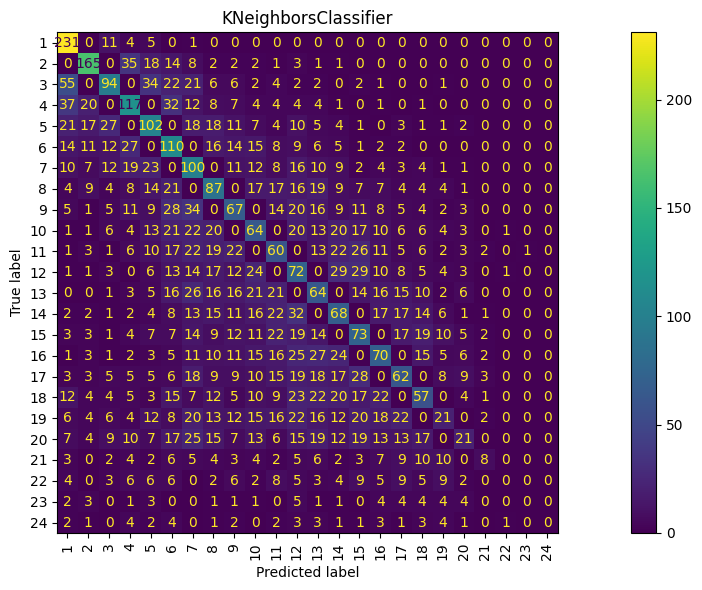

In [3]:
X_selected = X[
    [
        "positionGrid",
        "constructorRef",
        "driverWins",
        "weather",
        "weatherWarm",
        "weatherCold",
        "weatherDry",
        "weatherWet",
        "weatherCloudy",
    ]
]
knn = KNeighborsClassifier(n_neighbors=99, metric="manhattan", weights="uniform")
model_test((knn,), X_selected, y, tscv, scorers=scorers, interval=1)

KNeighborsClassifier(metric='manhattan', n_neighbors=99):
CV with make_scorer(balanced_accuracy_1interval_score): 0.27761426914836007
              precision    recall  f1-score   support

           1       0.52      0.82      0.64       252
           2       0.54      0.63      0.59       252
           3       0.37      0.36      0.37       252
           4       0.38      0.30      0.33       252
           5       0.26      0.29      0.27       252
           6       0.24      0.38      0.30       252
           7       0.22      0.33      0.26       252
           8       0.22      0.29      0.25       252
           9       0.22      0.24      0.23       252
          10       0.19      0.26      0.22       252
          11       0.22      0.32      0.26       252
          12       0.20      0.28      0.23       252
          13       0.24      0.26      0.25       252
          14       0.20      0.18      0.19       252
          15       0.29      0.22      0.25       252
 

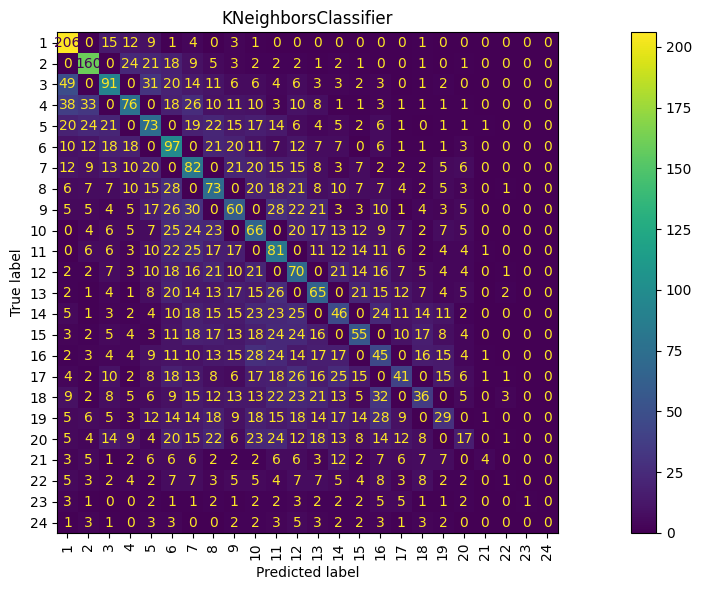

In [4]:
knn = KNeighborsClassifier(n_neighbors=99, metric="manhattan", weights="uniform")
model_test((knn,), X, y, tscv, scorers=scorers, interval=1)

## Decision Tree


DecisionTreeClassifier(max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.35486018400791125
              precision    recall  f1-score   support

           1       0.70      0.87      0.77       252
           2       0.66      0.75      0.70       252
           3       0.48      0.64      0.55       252
           4       0.40      0.57      0.47       252
           5       0.40      0.40      0.40       252
           6       0.43      0.40      0.42       252
           7       0.23      0.36      0.28       252
           8       0.36      0.35      0.35       252
           9       0.18      0.28      0.22       252
          10       0.45      0.29      0.35       252
          11       0.21      0.29      0.24       252
          12       0.20      0.33      0.25       252
          13       0.34      0.19      0.24       252
          14       0.58      0.31      0.41       252
          15       0.17      0.34      0.23       252
          16       0.4

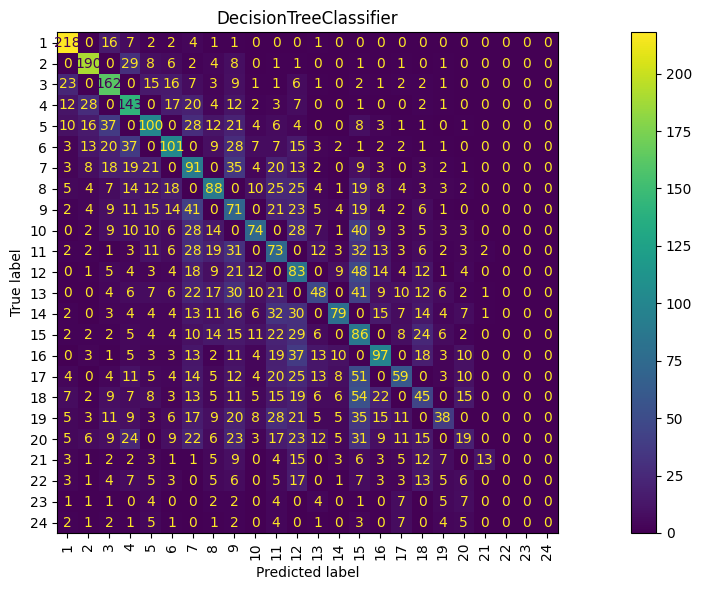

In [5]:
X_selected = X[
    [
        "positionGrid",
        "driverNationality",
        "constructorNationality",
        "raceYear",
        "raceRound",
        "grandPrix",
        "raceTime",
        "circuitLocation",
        "circuitCountry",
        "circuitLat",
        "driverWins",
        "q1",
        "q2",
        "q3",
        "weather",
        "weatherWarm",
        "weatherCold",
        "weatherDry",
        "weatherWet",
        "weatherCloudy",
    ]
]
tree = DecisionTreeClassifier(max_depth=4, criterion="gini", splitter="best")
model_test((tree,), X_selected, y, tscv, scorers=scorers, interval=1)

DecisionTreeClassifier(max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3392646747192201
              precision    recall  f1-score   support

           1       0.69      0.83      0.75       252
           2       0.57      0.69      0.63       252
           3       0.54      0.60      0.57       252
           4       0.37      0.53      0.44       252
           5       0.35      0.38      0.37       252
           6       0.44      0.42      0.43       252
           7       0.22      0.37      0.28       252
           8       0.37      0.29      0.33       252
           9       0.21      0.26      0.23       252
          10       0.31      0.27      0.29       252
          11       0.24      0.38      0.29       252
          12       0.17      0.38      0.24       252
          13       0.41      0.25      0.31       252
          14       0.31      0.26      0.29       252
          15       0.19      0.23      0.21       252
          16       0.35

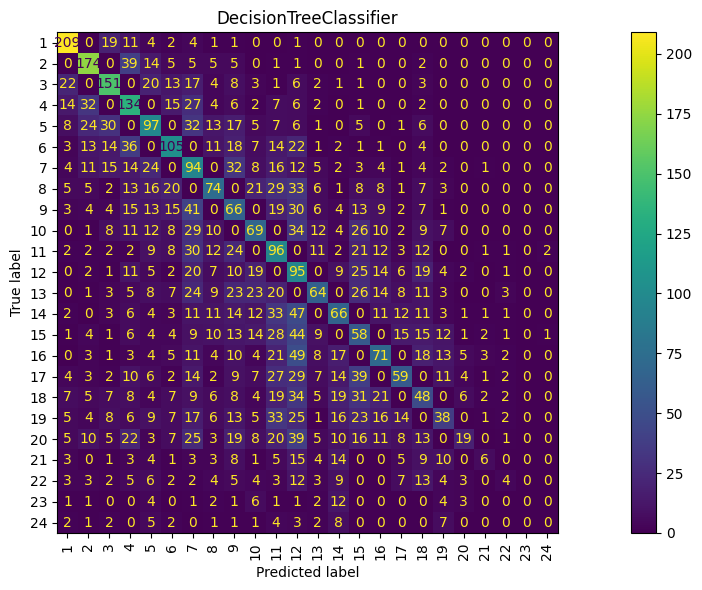

In [6]:
tree = DecisionTreeClassifier(max_depth=4, criterion="gini", splitter="best")
model_test((tree,), X, y, tscv, scorers=scorers, interval=1)

## Random Forest


RandomForestClassifier(max_depth=6, n_estimators=143):
CV with make_scorer(balanced_accuracy_1interval_score): 0.35691465941465944
              precision    recall  f1-score   support

           1       0.58      0.94      0.72       252
           2       0.63      0.82      0.71       252
           3       0.49      0.65      0.56       252
           4       0.40      0.52      0.45       252
           5       0.45      0.41      0.43       252
           6       0.30      0.42      0.35       252
           7       0.29      0.35      0.32       252
           8       0.38      0.24      0.29       252
           9       0.22      0.21      0.21       252
          10       0.32      0.21      0.26       252
          11       0.25      0.29      0.27       252
          12       0.21      0.37      0.27       252
          13       0.32      0.29      0.30       252
          14       0.26      0.26      0.26       252
          15       0.34      0.34      0.34       252
    

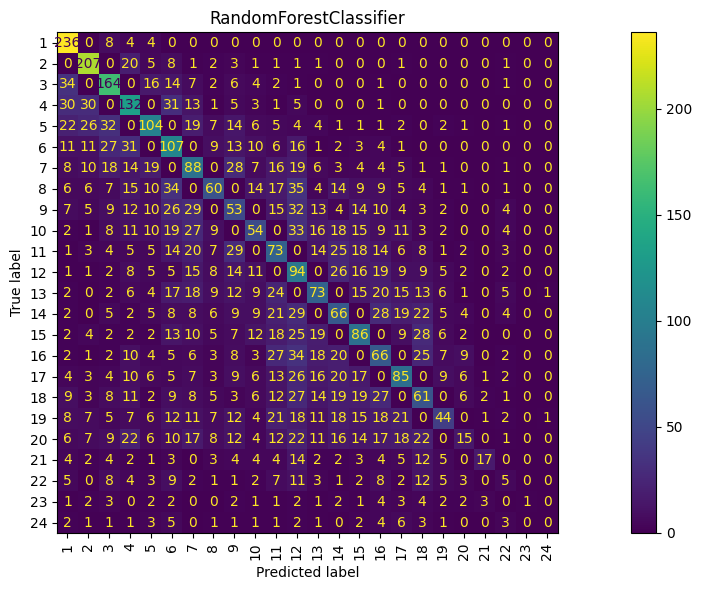

In [7]:
X_selected = X[
    [
        "positionGrid",
        "driverRef",
        "driverNationality",
        "constructorNationality",
        "grandPrix",
        "circuitRef",
        "driverWins",
        "constructorWins",
        "q1",
        "weather",
        "weatherWarm",
        "weatherCold",
        "weatherDry",
        "weatherWet",
        "weatherCloudy",
    ]
]
random_forest = RandomForestClassifier(max_depth=6, n_estimators=143, criterion="gini")
model_test((random_forest,), X_selected, y, tscv, scorers=scorers, interval=1)

RandomForestClassifier(max_depth=6, n_estimators=143):
CV with make_scorer(balanced_accuracy_1interval_score): 0.35502311871630055
              precision    recall  f1-score   support

           1       0.54      0.94      0.69       252
           2       0.63      0.82      0.71       252
           3       0.46      0.58      0.51       252
           4       0.38      0.53      0.45       252
           5       0.40      0.38      0.39       252
           6       0.29      0.43      0.34       252
           7       0.30      0.35      0.32       252
           8       0.42      0.25      0.31       252
           9       0.24      0.20      0.22       252
          10       0.25      0.22      0.24       252
          11       0.27      0.33      0.29       252
          12       0.23      0.37      0.28       252
          13       0.27      0.30      0.28       252
          14       0.23      0.20      0.22       252
          15       0.34      0.27      0.30       252
    

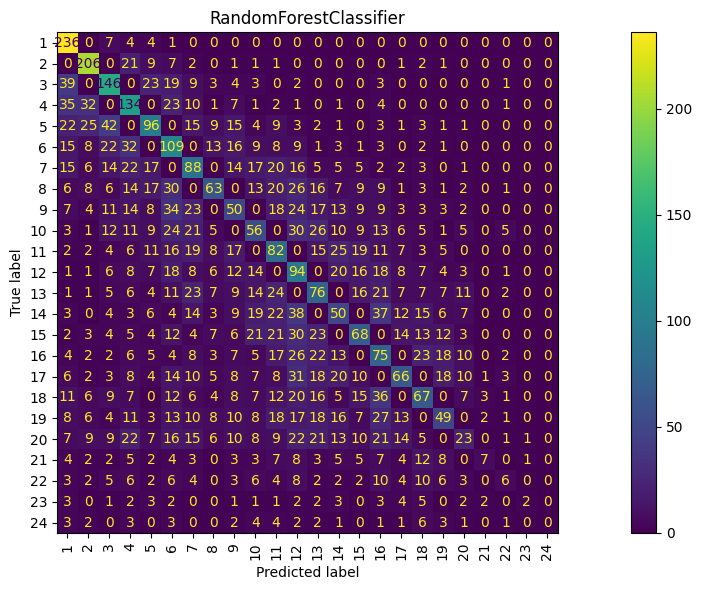

In [8]:
random_forest = RandomForestClassifier(max_depth=6, n_estimators=143, criterion="gini")
model_test((random_forest,), X, y, tscv, scorers=scorers, interval=1)

## Multilayer Perceptron


MLPClassifier(activation='logistic', hidden_layer_sizes=(46, 26, 31)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3644001789456335
              precision    recall  f1-score   support

           1       0.60      0.95      0.73       252
           2       0.65      0.78      0.71       252
           3       0.57      0.58      0.57       252
           4       0.44      0.52      0.48       252
           5       0.38      0.46      0.42       252
           6       0.33      0.47      0.39       252
           7       0.34      0.35      0.35       252
           8       0.33      0.30      0.32       252
           9       0.21      0.28      0.24       252
          10       0.44      0.33      0.38       252
          11       0.18      0.30      0.23       252
          12       0.24      0.31      0.27       252
          13       0.38      0.19      0.25       252
          14       0.48      0.21      0.29       252
          15       0.25      0.33      0.28

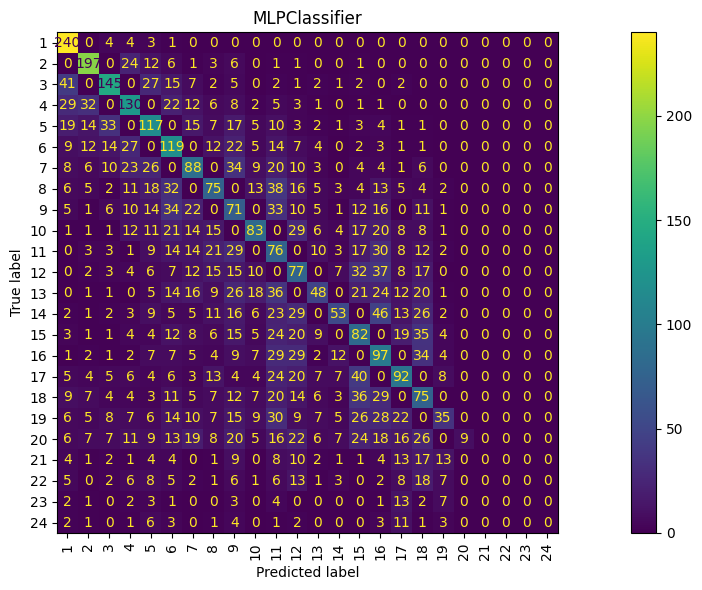

In [9]:
X_selected = X[
    [
        "positionGrid",
        "driverNationality",
        "circuitRef",
        "circuitCountry",
        "circuitLat",
        "driverWins",
        "driverAgeToday",
        "driverAgeAtRace",
        "weather",
        "weatherWarm",
        "weatherCold",
        "weatherDry",
        "weatherWet",
        "weatherCloudy",
    ]
]
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 26, 31))
model_test((nn,), X_selected, y, tscv, scorers=scorers, interval=1)

MLPClassifier(activation='logistic', hidden_layer_sizes=(46, 26, 31)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3574248899248899
              precision    recall  f1-score   support

           1       0.62      0.92      0.74       252
           2       0.61      0.74      0.67       252
           3       0.59      0.54      0.56       252
           4       0.42      0.52      0.47       252
           5       0.39      0.51      0.44       252
           6       0.29      0.48      0.37       252
           7       0.31      0.40      0.35       252
           8       0.36      0.31      0.33       252
           9       0.27      0.23      0.25       252
          10       0.37      0.31      0.34       252
          11       0.16      0.30      0.21       252
          12       0.39      0.37      0.38       252
          13       0.19      0.22      0.20       252
          14       0.59      0.33      0.42       252
          15       0.22      0.33      0.27

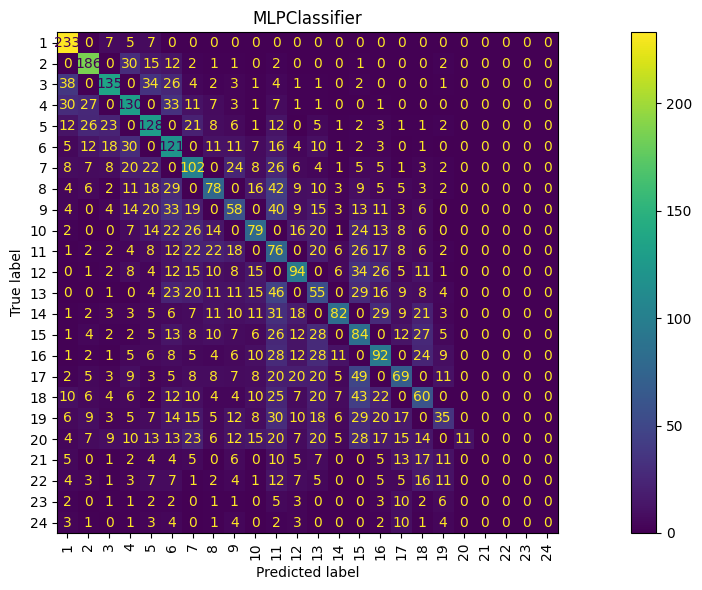

In [10]:
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 26, 31))
model_test((nn,), X, y, tscv, scorers=scorers, interval=1)

## Results


Based on the model in the previous section, i.e. with optimised attributes, performance has not improved.

With all attributes, we have smoothly improved the performance of the model, except in knn since it is a model that is highly dependent on dimensionality (the others may discriminate attributes or give them less importance). Attribute selection could be done to improve knn, but the only significant improvement would be in this one, and it probably won't outperform the others.
